# Classified Support Ticket scenario issues using text classifier(Naive bayes) in Machine Learning

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
df=pd.read_excel("Tickets.xlsx")
df

,Category,Short_des
0,Enquiry,How to Purchase MS items
1,Enquiry,Issue with Xbox subscription
2,Network,Issue with wifi
3,Enquiry,Not receiving emails
4,Hardware,Issue with harddrive
...,...,...
64,Enquiry,how long will it take to install updates
65,Office,configuration issue with outlook
66,Scam,Illeageal transactions
67,Account,delete my microsoft account permentaly


In [3]:
a=df['Category'].value_counts()  # Unbalanced data set will lead to biased decision
a

Enquiry     13
Account     11
Scam         9
Network      8
Software     8
Hardware     7
Office       6
Update       4
Xbox         3
Name: Category, dtype: int64

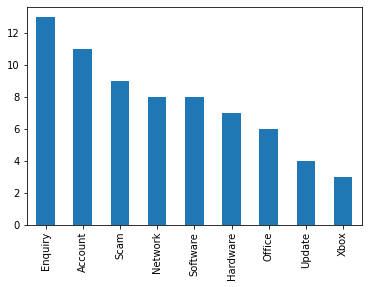

In [4]:
a.plot(kind='bar')

## Blancing the unbalanced data set by Random over-sampling 

In [5]:
xbox =df['Category'] == "Xbox"
df_try = df[xbox]
df=df.append([df_try]*4,ignore_index=True)

In [6]:
update =df['Category'] == "Update"
df_try = df[update]
df=df.append([df_try]*3,ignore_index=True)

In [7]:
office =df['Category'] == "Office"
df_try = df[office]
df=df.append([df_try]*2,ignore_index=True)

In [8]:
hardware=df['Category'] == "Hardware"
df_try = df[hardware]
df=df.append([df_try]*2,ignore_index=True)

In [9]:
software=df['Category'] == "Software"
df_try = df[software]
df=df.append([df_try]*2,ignore_index=True)

In [10]:
network=df['Category'] == "Network"
df_try = df[network]
df=df.append([df_try]*2,ignore_index=True)

In [11]:
scam=df['Category'] == "Scam"
df_try = df[scam]
df=df.append([df_try]*1,ignore_index=True)

In [12]:
account=df['Category'] == "Account"
df_try = df[account]
df=df.append([df_try]*1,ignore_index=True)

In [13]:
df['Category'].value_counts() # Balanced data set

Network     24
Software    24
Account     22
Hardware    21
Scam        18
Office      18
Update      16
Xbox        15
Enquiry     13
Name: Category, dtype: int64

## Creating input and output variables for train & test

In [14]:
X=df['Short_des']  # input variable
y=df['Category']   # output variable

## Create train and test split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=135)
X_train.shape

(136,)

## Count vertorizer - Convert a collection of text documents to a martix of token counts

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
#count_vect= CountVectorizer()
#X_train_counts= count_vect.fit_transform(X_train)

In [17]:
#X_train_counts.toarray()

In [18]:
#X_train_counts.shape

## Tfidf- Term-frequency inverse document frequency 
#### Term frequency (TF)measures how frequently a term occurs in document
#### inverse document frequency(IDF) which measures how important a term is

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
#tfidf_transformer=TfidfTransformer()
#X_train_tfidf= tfidf_transformer.fit_transform(X_train_counts)
#X_train_tfidf.shape

## Naive bayes Classifier 

In [20]:
from sklearn.naive_bayes import MultinomialNB
#clf = MultinomialNB().fit(X_train_tfidf,y_train)

## Pipeline Model

In [21]:
from sklearn.pipeline import Pipeline
text_clf= Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])
text_clf= text_clf.fit(X_train,y_train)

## Score ( Measures the accuracy of the model against the training data)

In [22]:
pred = text_clf.predict(X_test)
text_clf.score(X_test,y_test)

0.9428571428571428

In [23]:
pred

array(['Hardware', 'Software', 'Software', 'Software', 'Network',
       'Account', 'Network', 'Scam', 'Hardware', 'Scam', 'Software',
       'Enquiry', 'Software', 'Scam', 'Hardware', 'Update', 'Network',
       'Scam', 'Office', 'Account', 'Update', 'Xbox', 'Network', 'Office',
       'Enquiry', 'Network', 'Update', 'Update', 'Account', 'Hardware',
       'Account', 'Account', 'Office', 'Xbox', 'Account'], dtype='<U8')

In [24]:
X_train

66               Illeageal transactions
113           Mouse sensor not working 
161                      MSA is blocked
76                  Gaming server issue
104    configuration issue with outlook
                     ...               
12      What is the price of windows 10
62             Unable to sync one note 
22                  How to set up Azure
124                   Apps gets crashed
159              Illeageal transactions
Name: Short_des, Length: 136, dtype: object

In [25]:
y_train

66         Scam
113    Hardware
161     Account
76         Xbox
104      Office
         ...   
12      Enquiry
62       Office
22      Enquiry
124    Software
159        Scam
Name: Category, Length: 136, dtype: object

In [26]:
X_test

109                          Graphic card failure
155                              Theart and virus
35                               Theart and virus
130                Windows store is not updating 
138                Printer not showing on network
60               microsoft account is been hacked
37                         File sharing has error
58                        Computer is compromised
4                           Issue with harddrive 
26                       Remote access by scammer
39                    Microsoft games shows error
20                           How to take a backup
128                             Blue screen error
152                            Received scam call
111                 Motherboard or hardware crash
82                         Update is stuck at 36%
149                         IP address is blocked
156                                    Fake call 
32                      Unable to print from word
52                                  MSA is hacked


In [27]:
y_test

109    Hardware
155        Scam
35         Scam
130    Software
138     Network
60      Account
37      Network
58         Scam
4      Hardware
26         Scam
39     Software
20      Enquiry
128    Software
152        Scam
111    Hardware
82       Update
149     Network
156        Scam
32       Office
52      Account
91       Update
30         Xbox
140     Network
97       Office
15      Enquiry
136     Network
86       Update
90       Update
61      Account
118    Hardware
162     Account
170     Account
46       Office
78         Xbox
19      Account
Name: Category, dtype: object

## Predicting Output 

In [29]:
pred = text_clf.predict(['IP address is blocked'])
pred

array(['Network'], dtype='<U8')